<a href="https://colab.research.google.com/github/ayushxx7/pandas-course-project/blob/master/learning_from_my_youtube_watch_history.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1Wtz6lkkuAuUms4RROC4sA67WSBaN0v6t')

# Learning from my Youtube watch history

I like YouTube. A lot. It is a great tool to learn new skills and enjoy diverse culture from the whole world. What I don't like is YouTube's algorithm constatly trying to grab my attention to sell it to advertisers. I feel too often trapped in pressing the next recommended video not even realizing what I am doing. As feelings are not always useful to understand myself, I decided to analyse the YouTube watch history to understand my usage with data.

This notebook is a course project for the class _[Data Analysis with Python: Zero to Pandas](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas)_ by Jovian.ml and has been inspired by the following analyses:
* [Analyzing your browser history using Pandas & Seaborn](https://medium.com/free-code-camp/understanding-my-browsing-pattern-using-pandas-and-seaborn-162b97e33e51) by Kartik Godawat
* [WhatsApp Chat Data Analysis](https://jovian.ml/PrajwalPrashanth/whatsapp-chat-data-analysis) by Prajwal Prashanth

## Data Preparation and Cleaning

I will be using the following modules:

In [1]:
!pip install pandas matplotlib seaborn jovian numpy --upgrade --quiet

     |████████████████████████████████| 9.5MB 3.3MB/s 
     |████████████████████████████████| 11.6MB 54.6MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 14.5MB 189kB/s 
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import jovian
import numpy as np
%matplotlib inline

And start by saving the notebook to jovian.ml

In [ ]:
project_name = "learning-from-my-youtube-watch-history"

In [ ]:
jovian.commit(project=project_name, environment="pip")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "lucafrance/learning-from-my-youtube-watch-history" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/lucafrance/learning-from-my-youtube-watch-history


'https://jovian.ml/lucafrance/learning-from-my-youtube-watch-history'

### Retrieving the data with Google Takeout
Youtube's data can be downloaded from [Google Takeout](https://takeout.google.com/settings/takeout) by checking _Youtube and YouTube Music_.

![Google Takeout 01.png](attachment:ac700d43-a48f-4d45-bb44-0132df0a89ee.png)

Before proceeding, I cliked _Multiple formats_ and picked _json_ for the watch history.

![2020-09-25 09_15_22-Window.png](attachment:52295898-b1a4-4516-9464-d4f7105c44e0.png)

The next option is to choose how the data should be delivered.

![Google Takeout 02.png](attachment:8ad42132-9a84-4f70-8de5-9d641e42396e.png)

An email is sent once the data is ready. In my case it just took a few minutes.

![Google Takeout 03.png](attachment:0841562b-9dde-45ad-9091-84750401c39c.png)

I then copied the files _subscriptions.json_ and _watch_history.json_ to a _youtube-takeout_ folder in this notebook's location.

My data is restricted to the last three months, as that's the limit I set in Google's privacy settings.

In [ ]:
jovian.commit(environment="pip")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "lucafrance/learning-from-my-youtube-watch-history" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/lucafrance/learning-from-my-youtube-watch-history


'https://jovian.ml/lucafrance/learning-from-my-youtube-watch-history'

### Reading the subscriptions

The subscriptions list is provided as a json file, which I read with the standard `json` module.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os
takeout_zip_path = "/content/drive/My Drive/takeout-20201008T123312Z-001.zip"

In [16]:
from zipfile import ZipFile

with ZipFile(takeout_zip_path) as myzip:
    myzip.extractall(path='takeout_ayush')

In [17]:
print(os.listdir('takeout_ayush'))

['Takeout']


In [18]:
subs_src = json.load(open("/content/takeout_ayush/Takeout/YouTube and YouTube Music/subscriptions/subscriptions.json", "rt", encoding="utf8"))

`json.load` automatically read and interpreted the file as list of dictionaries. 

In [19]:
type(subs_src)

list

In [20]:
type(subs_src[0])

dict

Looking at the dictionary structure for the first subscription I was able to see how to retrieve the information I was interested in. 

In [21]:
subs_src[0]

{'contentDetails': {'activityType': 'all',
  'newItemCount': 0,
  'totalItemCount': 294},
 'etag': 'FdywJ09rJe_KD7M3ndjhRe3PUhM',
 'id': 'Ib0_uYXMOOijOy4QbxVCDT6ncQPVM-yvoDAI1Ikk8xo',
 'kind': 'youtube#subscription',
 'snippet': {'channelId': 'UCq0-qpfVb24-28m9A5b1VIw',
  'description': 'An element of truth - videos about science, education, and anything else I find interesting.',
  'publishedAt': '2014-10-14T19:26:38.000Z',
  'resourceId': {'channelId': 'UCHnyfMqiRRG1u-2MsSQLbXA',
   'kind': 'youtube#channel'},
  'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/-uMv_62rHYAY/AAAAAAAAAAI/AAAAAAAAAAA/4VP2Io8W-PY/s88-c-k-no-mo-rj-c0xffffff/photo.jpg'},
   'high': {'url': 'https://yt3.ggpht.com/-uMv_62rHYAY/AAAAAAAAAAI/AAAAAAAAAAA/4VP2Io8W-PY/s800-c-k-no-mo-rj-c0xffffff/photo.jpg'},
   'medium': {'url': 'https://yt3.ggpht.com/-uMv_62rHYAY/AAAAAAAAAAI/AAAAAAAAAAA/4VP2Io8W-PY/s240-c-k-no-mo-rj-c0xffffff/photo.jpg'}},
  'title': 'Veritasium'}}

In [22]:
subs_src[0]["snippet"]["title"]

'Veritasium'

In [23]:
subs_src[0]["snippet"]["description"]

'An element of truth - videos about science, education, and anything else I find interesting.'

In [24]:
subs_src[0]["snippet"]["resourceId"]["channelId"]

'UCHnyfMqiRRG1u-2MsSQLbXA'

I then put this information in a dictionary of lists, which I then converted to a Pandas `DataFrame`. From the channel id I was also able to compute the channel url.

In [25]:
subs_dict = {"channel-id": [], "channel-url": [], "channel-name": [], "channel-description": []}

In [26]:
for sub in subs_src:
    subs_dict["channel-id"].append(sub["snippet"]["resourceId"]["channelId"])
    subs_dict["channel-url"].append("https://www.youtube.com/channel/" + sub["snippet"]["resourceId"]["channelId"])
    subs_dict["channel-name"].append(sub["snippet"]["title"])
    subs_dict["channel-description"].append(sub["snippet"]["description"])

In [27]:
subs_df = pd.DataFrame(subs_dict)
subs_df.sample(5)

,channel-id,channel-url,channel-name,channel-description
55,UC1J4DKcJXENzC-FkyMU6dow,https://www.youtube.com/channel/UC1J4DKcJXENzC...,Shane Starnes,Your Channel for all the Latest in Android New...
85,UCtg5C-d_3rPUgMaxr285mQQ,https://www.youtube.com/channel/UCtg5C-d_3rPUg...,Top Trending,"The most random, yet interesting videos on the..."
106,UC5BLAk4v77FGs3YddalbDAA,https://www.youtube.com/channel/UC5BLAk4v77FGs...,Robin,Trying to tell a story here.
27,UCo8bcnLyZH8tBIH9V1mLgqQ,https://www.youtube.com/channel/UCo8bcnLyZH8tB...,TheOdd1sOut,What I use:\nI draw my pictures on Paint Tools...
116,UC8vlDm5xvbxOrCvdu9UNOiA,https://www.youtube.com/channel/UC8vlDm5xvbxOr...,Techno Ruhez,"Hi Guys! My name is Ruhez Amrelia, and I'm a 2..."


In [ ]:
jovian.commit(environment="pip")

### Reading the watch history

I also downloaded the watch history as a json file and read it with the `json` module.

In [ ]:
wh_src = json.load(open("youtube-takeout/watch-history.json", "rt", encoding="utf8"))

As for the subscribtions, the watch history is a list of dicitionaries.

In [ ]:
type(wh_src)

list

In [ ]:
type(wh_src[0])

dict

By looking at the first element, I was able to retrieve the information I was intersted in.

In [ ]:
wh_src[0]

{'header': 'YouTube',
 'title': 'Watched How to create space between sections of your notes in Apple Notes| One minute tutorial',
 'titleUrl': 'https://www.youtube.com/watch?v=YoB2pChTXlA',
 'subtitles': [{'name': 'Paperless X',
   'url': 'https://www.youtube.com/channel/UCCfATzxU-7qbvUuMWpjOLkQ'}],
 'time': '2020-09-25T06:16:34.114Z',
 'products': ['YouTube']}

In [ ]:
wh_src[0]["title"]

'Watched How to create space between sections of your notes in Apple Notes| One minute tutorial'

In [ ]:
wh_src[0]["titleUrl"]

'https://www.youtube.com/watch?v=YoB2pChTXlA'

In [ ]:
wh_src[0]["time"]

'2020-09-25T06:16:34.114Z'

For some reason, the channel information is saved under "subtitles".

In [ ]:
wh_src[0]["subtitles"][0]["name"]

'Paperless X'

In [ ]:
wh_src[0]["subtitles"][0]["url"]

'https://www.youtube.com/channel/UCCfATzxU-7qbvUuMWpjOLkQ'

The subtitles field is missing for videos which are no longer available. In this case the video url is given as the title.

In [ ]:
for view in wh_src:
    if "subtitles" not in view:
        break
view

{'header': 'YouTube',
 'title': 'Watched https://www.youtube.com/watch?v=UzNM6ZEko9A',
 'titleUrl': 'https://www.youtube.com/watch?v=UzNM6ZEko9A',
 'time': '2020-09-24T20:00:22.126Z',
 'products': ['YouTube']}

In other cases even the url is missing.

In [ ]:
for view in wh_src:
    if view["title"] == "Watched a video that has been removed":
        break
view

{'header': 'YouTube',
 'title': 'Watched a video that has been removed',
 'time': '2020-06-05T19:23:25.181Z',
 'products': ['YouTube']}

Viewed stories are also included and I just ignored them for the analysis.

In [ ]:
for view in wh_src:
    if view["title"].startswith("Watched story from "):
        break
view

{'header': 'YouTube',
 'title': 'Watched story from Scottecs',
 'subtitles': [{'name': 'Scottecs',
   'url': 'https://www.youtube.com/user/scottecs'}],
 'time': '2020-09-11T15:58:55.488Z',
 'products': ['YouTube']}

Knowing this, I fed the information to a dictionary which I then converted to a `DataFrame`.

In [ ]:
wh_dict = {
    "video-title": [],
    "video-url": [],
    "time": [],
    "channel-name": [],
    "channel-url": [],
    "subscribed": [],
}

for view in wh_src:
    video_title = view["title"] 
    
    # Ignore stories
    if video_title.startswith("Watched story from "):
        continue
    
    # Read video title
    video_title = video_title[len("Watched "):]
    wh_dict["video-title"].append(video_title)
    
    # Read video url
    if not "titleUrl" in view:
        video_url = None
    else:
        video_url = view["titleUrl"]
    wh_dict["video-url"].append(video_url)
    
    # Read view time
    wh_dict["time"].append(view["time"])
    
    # Read the channel information if available
    if not "subtitles" in view:
        channel_name = None
        channel_url = None 
    else:
        channel_name = view["subtitles"][0]["name"]
        channel_url = view["subtitles"][0]["url"]
    
    wh_dict["channel-name"].append(channel_name)
    wh_dict["channel-url"].append(channel_url)
    
    # Check whether I am subscribed to the channel
    if channel_url is None:
        subscribed = None
    else:
        subscribed = channel_url in list(subs_df["channel-url"])
    wh_dict["subscribed"].append(subscribed)
    
wh_df = pd.DataFrame(wh_dict)    
wh_df["time"] = pd.to_datetime(wh_df["time"])

wh_df.sample(5)

,video-title,video-url,time,channel-name,channel-url,subscribed
1605,LA CENA IN FASE 2,https://www.youtube.com/watch?v=uMLbExDyRm4,2020-05-30 09:21:05.417000+00:00,Minimad,https://www.youtube.com/channel/UC0oObx_f7G_FV...,True
1521,Plant Diseases,https://www.youtube.com/watch?v=LFvaD2d8Vd4,2020-06-05 11:22:17.821000+00:00,Sam O'Nella Academy,https://www.youtube.com/channel/UC1DTYW241WD64...,True
270,The First Guy To Ever Have A Name,https://www.youtube.com/watch?v=jWBDa-2Y5LU,2020-09-10 17:44:52.063000+00:00,Ryan George,https://www.youtube.com/channel/UCh9IfI45mmk59...,False
661,Garbage Reviews: The Order 1886,https://www.youtube.com/watch?v=ij7PwB_KiZA,2020-08-11 10:15:57.029000+00:00,Kilian Experience,https://www.youtube.com/channel/UCjdQaSJCYS4o2...,True
806,I Crash The Economy Of A Game Without An Econo...,https://www.youtube.com/watch?v=Qdd3b_wp5r0,2020-07-29 19:49:13.445000+00:00,Kilian Experience,https://www.youtube.com/channel/UCjdQaSJCYS4o2...,True


In [ ]:
jovian.commit(environment="pip")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "lucafrance/learning-from-my-youtube-watch-history" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/lucafrance/learning-from-my-youtube-watch-history


'https://jovian.ml/lucafrance/learning-from-my-youtube-watch-history'

## Learning from data 

### How many videos did I watch? 

In [ ]:
views_count = len(wh_df)

In [ ]:
max_time = wh_df["time"].max()
min_time = wh_df["time"].min()

In [ ]:
print("The dataset includes views from {} to {}.".format(min_time, max_time))

The dataset includes views from 2020-05-29 13:13:23.835000+00:00 to 2020-09-25 06:16:34.114000+00:00.


In [ ]:
days_count = max_time - min_time
days_count = days_count.days

In [ ]:
avg_views = views_count / days_count

In [ ]:
print("I watched {} videos over {} days. That's an average of {:.1f} per day.".format(views_count, days_count, avg_views))

I watched 1615 videos over 118 days. That's an average of 13.7 per day.


In [ ]:
count_subscribed = len(wh_df[wh_df["subscribed"] == True])
count_not_subscribed = len(wh_df[wh_df["subscribed"] == False])
count_missing = len(wh_df) - count_subscribed - count_not_subscribed

In [ ]:
print("I was subscribed to the channel for {} views, not subscribed for {}, and {} videos I watched are no longer available.".format(count_subscribed, count_not_subscribed, count_missing))

I was subscribed to the channel for 1120 views, not subscribed for 484, and 11 videos I watched are no longer available.


In [ ]:
df = pd.DataFrame({
    "channel status": ["subscribed", "not subscribed", "not available"],
    "view count": [count_subscribed, count_not_subscribed, count_missing],
})

<AxesSubplot:xlabel='view count', ylabel='channel status'>

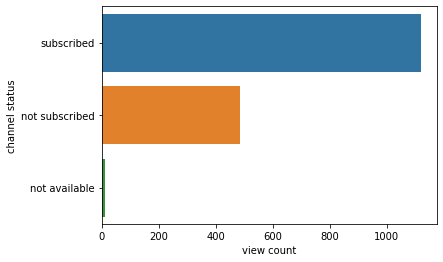

In [ ]:
sns.barplot(y="channel status", x="view count", data=df)

### Whend did I watch the most videos?

To know when my watch time is concentrated, I added a weekday and a watch hour column to the `DataFrame` based on the watch time. I also added a column just with ones to be pivoted and summed in a heath map.

In [ ]:
wh_df["weekday"] = [timestamp.isoweekday() for timestamp in wh_df["time"]]
wh_df["hour"] = [timestamp.hour for timestamp in wh_df["time"]]
wh_df["ones"] = np.ones(len(wh_df))

wh_df[["time", "weekday", "hour", "ones"]].sample(5)

,time,weekday,hour,ones
773,2020-07-31 14:16:24.693000+00:00,5,14,1.0
1186,2020-07-04 15:40:15.271000+00:00,6,15,1.0
469,2020-08-28 04:25:18.583000+00:00,5,4,1.0
89,2020-09-20 07:36:22.412000+00:00,7,7,1.0
555,2020-08-19 10:23:31.273000+00:00,3,10,1.0


In [ ]:
views = wh_df.pivot_table(index="weekday", columns="hour", values="ones", aggfunc=np.sum, fill_value=0)

<AxesSubplot:xlabel='hour', ylabel='weekday'>

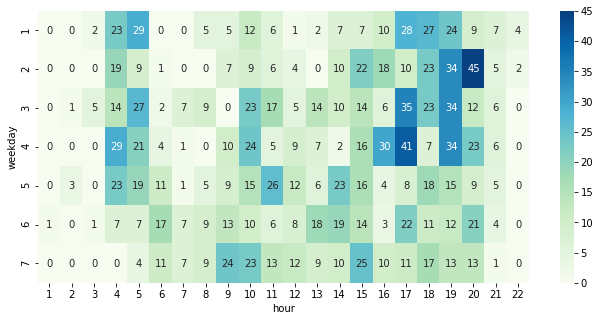

In [ ]:
plt.figure(figsize = (11, 5))
sns.heatmap(views, annot=True, cmap="GnBu")

I watched videos mostly in the morning and in the evening on weekdays, while my views are more spread out on weekends.

I also wanted to know whether my YouTube usage changed over time, for that I added a week number column and pivoted over it to plot the views per week.

In [ ]:
wh_df["weeknum"] = [timestamp.isocalendar()[1] for timestamp in wh_df["time"]]

wh_df[["time", "weeknum"]].sample(5)

,time,weeknum
364,2020-09-04 07:53:36.795000+00:00,36
892,2020-07-22 17:03:49.425000+00:00,30
382,2020-09-02 13:56:22.881000+00:00,36
968,2020-07-18 09:45:14.926000+00:00,29
1444,2020-06-10 04:46:37.595000+00:00,24


In [ ]:
df = wh_df.groupby("weeknum").count()
df.reset_index(inplace=True)
df.rename(columns=({"video-title": "view count"}), inplace=True)
df = df[["weeknum", "view count"]]

df.sample(5)

,weeknum,view count
0,22,35
7,29,111
4,26,77
13,35,89
8,30,81


<AxesSubplot:xlabel='weeknum', ylabel='view count'>

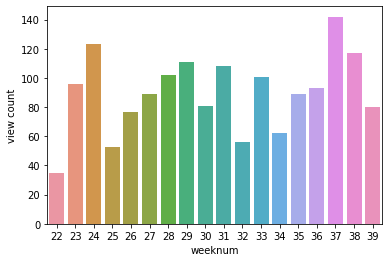

In [ ]:
sns.barplot(x="weeknum", y="view count", data=df)

There is no clear pattern here. Maybe on a bigger time scale it would be possible to see a trend.

### Which channels do I watch the most?
Similarly to the view count over time, I pivoted the view count over the channels and then plotted the views for the most viewed channels.

In [ ]:
# Count the views per channel
df = wh_df.groupby("channel-name").count()
# Reset the the channel-name from index to column for the plot
df.reset_index(inplace=True)
# All other columns include the view count, rename one of them to "view count" for the plot
df.rename(columns=({"video-title": "view count"}), inplace=True)
# Take and sort a sub-DataFrame to be plotted
df = df[["channel-name", "view count"]]
df.sort_values(by="view count", ascending=False, inplace=True)

df.head(10)

,channel-name,view count
166,Linus Tech Tips,91
116,Gus Johnson,79
151,Kilian Experience,72
220,Ryan George,72
224,Sam O'Nella Academy,65
338,sentdex,43
42,CGP Grey,37
258,The Escapist,33
67,Computerphile,30
119,Half as Interesting,30


<AxesSubplot:xlabel='view count', ylabel='channel-name'>

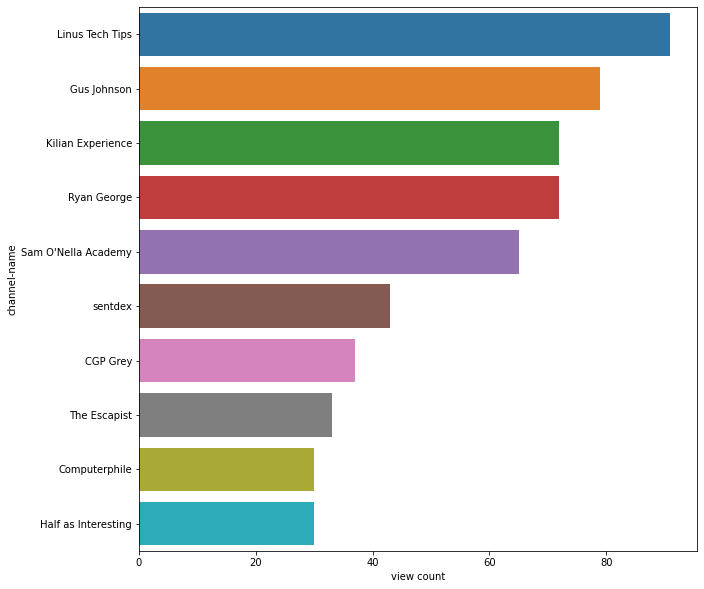

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(y="channel-name", x="view count", data=df.head(10))

Unsurprisingly, I got confirmation that I am a nerd and that I like comedy.

### How many channels do I actively watch? 

I also wanted to compare how my views were spread across different channels. For that I needed a list of:
* all the channels I watched or was subscribed to, 
* whether I was subscribed to them, 
* and how many videos did I watch.

In [ ]:
#Combine the channels from the watch history and subscription list
channels_arr = wh_df["channel-name"].append(subs_df["channel-name"]).unique()
channels_df = pd.DataFrame({"channel-name": channels_arr})
# Remove None value (it exists because of removed videos)
channels_df.dropna(inplace=True)
# Compute whether I am subscribed to the channel
channels_df["subscribed"] = [channel in list(subs_df["channel-name"]) for channel in list(channels_df["channel-name"])]
# Count the number of views
channels_df["view-count"] = [np.sum(wh_df["channel-name"] == channel_name) for channel_name in list(channels_df["channel-name"])]

channels_df.sample(5)

,channel-name,subscribed,view-count
223,Vsauce,True,1
158,explainity ® Erklärvideos,False,1
366,Joel Spolsky,True,0
129,MYPC,False,1
376,8-Bit Keys,True,0


I then plotted the number of channels per view count on two histograms, one for the subscribed channels and one for the not subscribed channels.

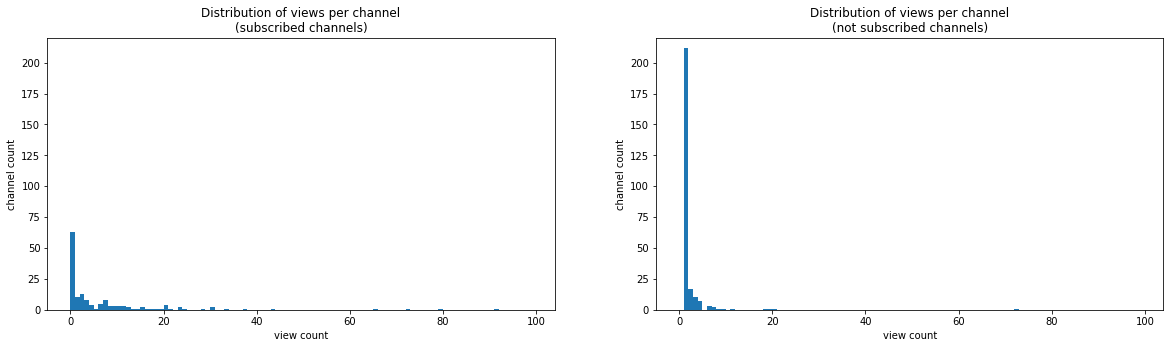

In [ ]:
channels_subscribed_df = channels_df[channels_df["subscribed"] == True]["view-count"] # == True is redundant but left for clarity
channels_not_subscribed_df = channels_df[channels_df["subscribed"] == False]["view-count"]

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
bins = np.arange(0, 100, 1)

axes[0].set_title("Distribution of views per channel\n(subscribed channels)")
axes[0].hist(channels_subscribed_df, bins=bins)

axes[1].set_title("Distribution of views per channel\n(not subscribed channels)")
axes[1].hist(channels_not_subscribed_df, bins=bins)

for i in [0, 1]:
    axes[i].set_xlabel("view count")
    axes[i].set_ylabel("channel count")
    axes[i].set_ylim(0, 220)

There are several subscribed channels I don't actively watch, as they have zero views. Most channels are under 30 views, with few channels having much more, even close to 100 views.

Most of the time I only watch one video when not subscribed to the channel. There are no unsubscribed channels with zero views, as they otherwise would not be included in the source data.

In [ ]:
jovian.commit(environment="pip")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "lucafrance/learning-from-my-youtube-watch-history" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/lucafrance/learning-from-my-youtube-watch-history


'https://jovian.ml/lucafrance/learning-from-my-youtube-watch-history'

## Next Steps
This data was useful but uncomfortable to see. I did not expect to have such heavy usage late at night disrupting my sleep cycle. Still, I was pleasantly surprised to see that my weekend usage was relatively low, probably because I tend to engage in other activities. On the other hand, I am more vulnerable on weekdays in the evenings. Therefore I am implementing a safeguarding solution by blocking YouTube on my network from Monday to Thursday.

![immagine.png](attachment:ae9b80b7-af72-4547-b42d-7d00cb8568bb.png)

Unfortunately my router does not support blocking websites on specific days, therefore I set a reminder every Sunday to ensure I turn it on again. 

This measure adds the minor inconvenience of also blocking useful tutorial videos I don't mind watching. fortunately, [I already wrote a script to download them in advance](https://github.com/lucafrance/videotutorial-hoarding).

I can still deactivate the restriction at any moment, therefore I must verify whether my willpower will be enough to resist the urge. Publishing this notebook online should also help as committment device. The system does not need to be failsafe, it just needs to add enough friction to my undesirable behaviour to make the transition easier.

Will it work? Maybe that will be the topic of a future notebook.

In [ ]:
jovian.commit(environment="pip")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "lucafrance/learning-from-my-youtube-watch-history" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/lucafrance/learning-from-my-youtube-watch-history


'https://jovian.ml/lucafrance/learning-from-my-youtube-watch-history'